In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
from scipy.stats import skew, kurtosis
import seaborn as sns

In [2]:
df = pd.read_csv("2019.csv")
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [3]:
y = df["Score"].values
x = df["GDP per capita"].values
print(len(x), len(y))

156 156


# wizaualizacja wybranych dancyh

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


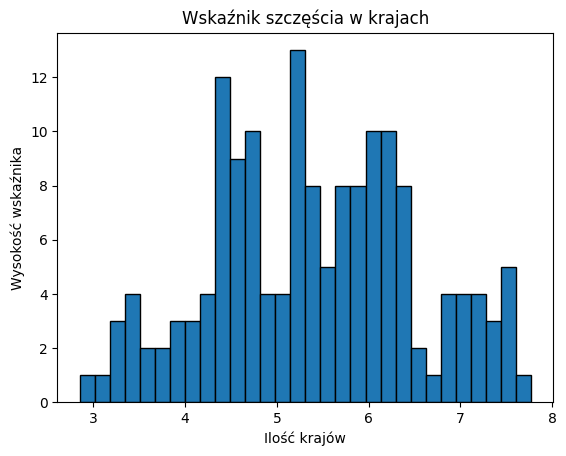

In [4]:
plt.hist(y, bins = 30, edgecolor='k')
plt.title("Wskaźnik szczęścia w krajach")
plt.xlabel("Ilość krajów")
plt.ylabel("Wysokość wskaźnika")
plt.legend(frameon=False)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


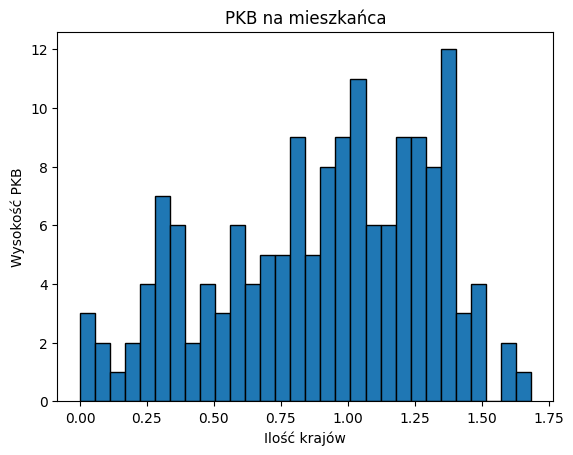

In [5]:
plt.hist(x, bins = 30, edgecolor='k')
plt.title("PKB na mieszkańca")
plt.xlabel("Ilość krajów")
plt.ylabel("Wysokość PKB")
plt.legend(frameon=False)
plt.show()

# miary położenia
zaczelam od mediany zeby ja pozniej zwizualizowac na ucinanej itp

### mediana

In [6]:
print(f'Wskaźnik: {np.median(y)}\n')
print(f'PKB: {np.median(x)}\n')


Wskaźnik: 5.3795

PKB: 0.96



### średnia arytmetyczna

In [7]:
print(f'Wskaźnik: {np.mean(y)}\n')
print(f'PKB: {np.mean(x)}\n')


Wskaźnik: 5.407096153846155

PKB: 0.905147435897436



### Średnia ruchoma

In [8]:
def moving_average(x, m):
    p = (m - 1)//2
    n = len(x)
    res = []
    for k in range(p, n - p):
        x_n = 0
        for j in range(-p, p):
            x_n += (1/m)*np.sum(x[j+k])
        res.append(x_n)
    return res

In [9]:
# print(f'Wskaźnik dla m=20: {moving_average(y, 20)}\n')
# print(f'PKB dla m=20: {moving_average(x, 20)}\n')

### średnia ucinana i windsorowska

In [10]:
def srednia_ucinana(x, k): #kod
    x = sorted(x)

    n = len(x)
    a = 1/(n - 2*k)

    x_i = []
    for i in range(k, n - k):
        x_i += [x[i]]
    
    result = a * sum(x_i)
    return result

def srednia_windsorowska(x, k):
    x = sorted(x)

    n = len(x)
    a = 1/n

    x_i = []
    for i in range(k + 1, n - k - 1):
        x_i += [x[i]]
        
    result =  a * ((k + 1) * x[k] + np.sum(x_i) + (k + 1) * x[n - k - 1])
    return result

In [11]:
n = len(y)//2

### porownanie windsorowskiej i ucinanej

In [12]:
def porównanie(lst, k):
    x_1 = np.arange(k)
    y_1 = [srednia_ucinana(lst, _ ) for _ in range(k)]
    plt.plot(x_1, y_1, label = "średnia ucinana", c="C0")

    y_2 = [srednia_windsorowska(lst, _ ) for _ in range(k)]
    plt.plot(x_1, y_2, label = "średnia windsorowska", c = 'C3') 
    
    # to można zakomentowac
    plt.plot(x_1, [np.mean(lst)]*k, label = "średnia arytmetyczna", linestyle='dashed', c = 'black')
    plt.plot(x_1, [np.median(lst)]*k, label = "mediana", linestyle='dashed', c ='grey')

    plt.title("Porównanie średniej ucinanej i windsorowskiej\n w zależności parametru k")
    plt.xlabel("k")
    plt.ylabel("Wartości")
    plt.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

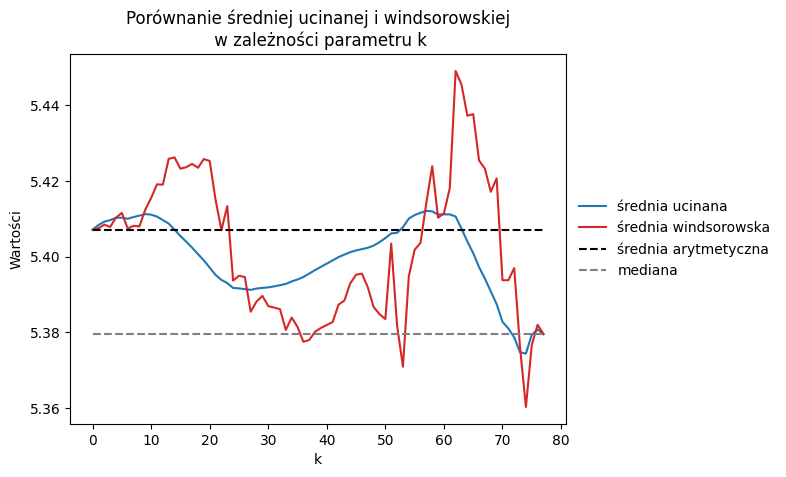

In [13]:
porównanie(y, n)

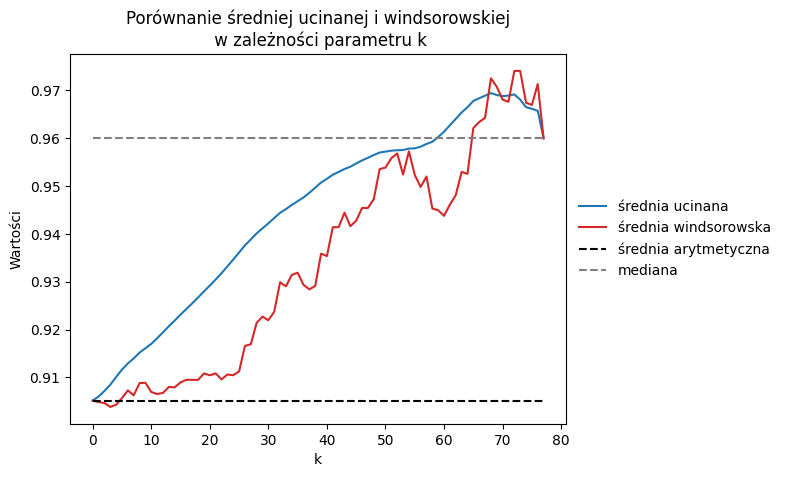

In [14]:
porównanie(x, n)

### kwartyle
i) $Q_{25}$

In [15]:
print(f'Wskaźnik: {np.quantile(y, 0.25, interpolation = "midpoint")}\n')
print(f'PKB: {np.quantile(x, 0.25, interpolation = "midpoint")}\n')

Wskaźnik: 4.541

PKB: 0.5945



ii) $Q_{75}$

In [16]:
print(f'Wskaźnik: {np.quantile(y, 0.75, interpolation = "midpoint")}\n')
print(f'PKB: {np.quantile(x, 0.75, interpolation = "midpoint")}\n')

Wskaźnik: 6.187

PKB: 1.234



### wykresy pudelkowe danych z mediana i kwartylami

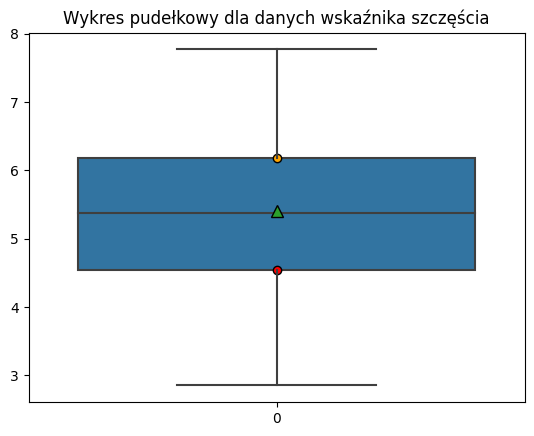

In [17]:
sns.boxplot(y, showmeans=True, meanprops={
                       "markeredgecolor": "black",
                       "markersize": "8"})

plt.title("Wykres pudełkowy dla danych wskaźnika szczęścia")
plt.scatter(0, np.quantile(y, 0.25, interpolation = "midpoint"), marker='o', edgecolors= 'k', c ='red')
plt.scatter(0, np.quantile(y, 0.75, interpolation = "midpoint"), marker='o',  edgecolors= 'k', c ='orange')

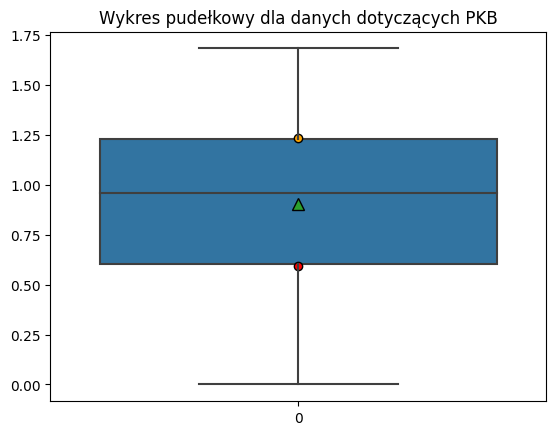

In [18]:
sns.boxplot(x, showmeans=True, meanprops={
                       "markeredgecolor": "black",
                       "markersize": "8"})
plt.title("Wykres pudełkowy dla danych dotyczących PKB")
plt.scatter(0, np.quantile(x, 0.25, interpolation = "midpoint"), marker='o', edgecolors= 'k', c ='red')
plt.scatter(0, np.quantile(x, 0.75, interpolation = "midpoint"), marker='o',  edgecolors= 'k', c ='orange')

# Miary rozproszenia

### rozstep miedzy kwartylowy

In [19]:
print(f'Wskaźnik: {st.iqr(y, interpolation="midpoint")}\n')
print(f'PKB: {st.iqr(x, interpolation="midpoint")}\n')

Wskaźnik: 1.646

PKB: 0.6395



### rozstep z próby

In [20]:
def rozstep(x):
    result = np.max(x) - np.min(x)
    return result

In [21]:
print(f'Wskaźnik: {rozstep(y)}\n')
print(f'PKB: {rozstep(x)}\n')

Wskaźnik: 4.916

PKB: 1.684



### wariancja

In [22]:
print(f'Wskaźnik: {np.var(y)}\n')
print(f'PKB: {np.var(x)}\n')

Wskaźnik: 1.2310933048570019

PKB: 0.15769676672419464



### odchylenie standardowe

In [23]:
print(f'Wskaźnik: {np.std(y)}\n')
print(f'PKB: {np.std(x)}\n')

Wskaźnik: 1.109546441054633

PKB: 0.39711052205172637



### odchylenie przecietne od wartości średniej

In [24]:
def odchylenie_od_wart_sr(x):
    n = len(x)
    result = (1/n)*sum(abs(x - np.mean(x)))
    return result

In [25]:
print(f'Wskaźnik: {odchylenie_od_wart_sr(y)}\n')
print(f'PKB: {odchylenie_od_wart_sr(x)}\n')

Wskaźnik: 0.9166486686390534

PKB: 0.3327054569362261



### wspołczynnik zmiennosci

In [26]:
def zmiennosc(x):
    result = (np.sqrt(np.var((x)))/np.mean(x))*100
    return result

In [27]:
print(f'Wskaźnik: {zmiennosc(y)}\n')
print(f'PKB: {zmiennosc(x)}\n')

Wskaźnik: 20.520190680637235

PKB: 43.87246831871087



# Miary asymetrii

### wspolczynnik skosnosci

In [28]:
print(f'Wskaźnik: {skew(y)}\n')
print(f'PKB: {skew(x)}\n')

Wskaźnik: 0.011339558437863922

PKB: -0.3815181618715272



### kurtoza

In [29]:
print(f'Wskaźnik: {kurtosis(y, fisher=False)}\n') # raczej jest na 3 jak pamietam
print(f'PKB: {kurtosis(x, fisher=False)}\n')

Wskaźnik: 2.3727331010298656

PKB: 2.2163371393717206



# gęstość

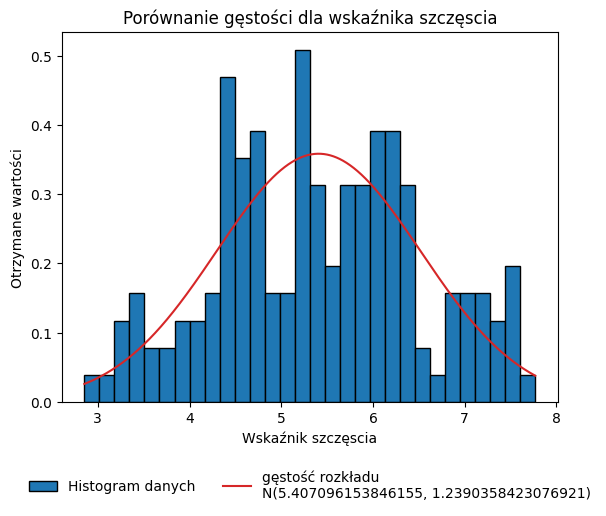

In [30]:
plt.hist(y, bins = 30, edgecolor='k', density=True, label = "Histogram danych")

t = np.linspace(np.min(y), np.max(y), 1000)
# mu, std = st.norm.fit(y)
# f_theo = st.norm.pdf(t, mu, std)
f_theo = st.norm.pdf(t, np.mean(y), np.sqrt(np.sum((y - np.mean(y))**2)/(len(y)-1)))
plt.plot(t, f_theo, label = f"gęstość rozkładu\nN({np.mean(y)}, {np.sum((y - np.mean(y))**2)/(len(y)-1)})", color = "C3")

plt.title("Porównanie gęstości dla wskaźnika szczęscia")
plt.xlabel("Wskaźnik szczęscia")
plt.ylabel("Otrzymane wartości")
plt.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)

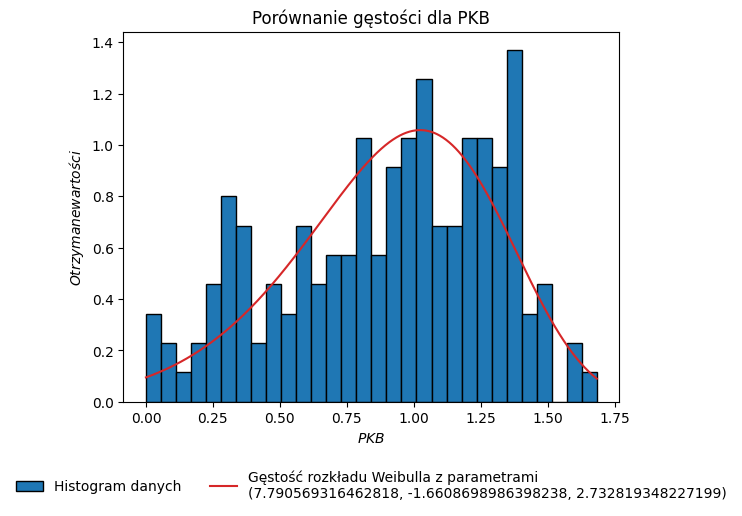

In [31]:
plt.hist(x, bins = 30, edgecolor='k', density=True, label = "Histogram danych")

t = np.linspace(np.min(x), np.max(x), 1000)
params = st.weibull_min.fit(x)
f_theo = st.weibull_min.pdf(t, params[0], loc =params[1], scale=params[2])
plt.plot(t, f_theo, label = f"Gęstość rozkładu Weibulla z parametrami\n{params[0], params[1], params[2]}", color = "C3")

plt.title("Porównanie gęstości dla PKB")
plt.xlabel("$PKB$")
plt.ylabel("$Otrzymane wartości$")
plt.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)

# dystrybuanta

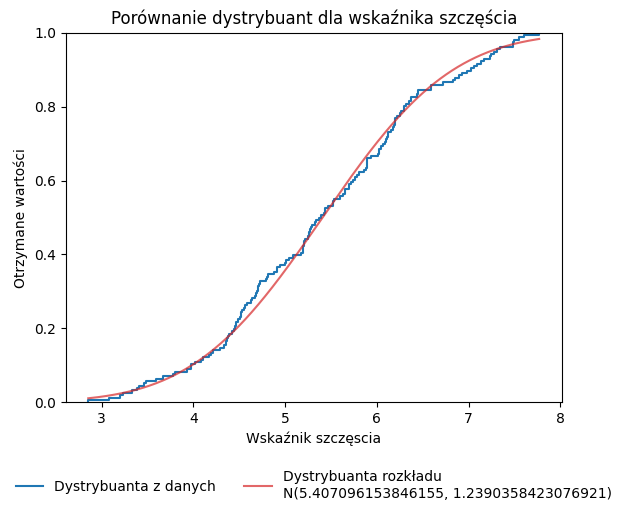

In [32]:
sns.ecdfplot(data = y, label = "Dystrybuanta z danych")

t = np.linspace(np.min(y), np.max(y), 1000)
F_theo = st.norm.cdf(t, np.mean(y), np.sqrt(np.sum((y - np.mean(y))**2)/(len(y)-1)))
plt.plot(t, F_theo, label = f"Dystrybuanta rozkładu\nN({np.mean(y)}, {np.sum((y - np.mean(y))**2)/(len(y)-1)})", color = "C3", alpha = 0.7)

plt.title("Porównanie dystrybuant dla wskaźnika szczęścia")
plt.xlabel("Wskaźnik szczęscia")
plt.ylabel("Otrzymane wartości")
plt.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)

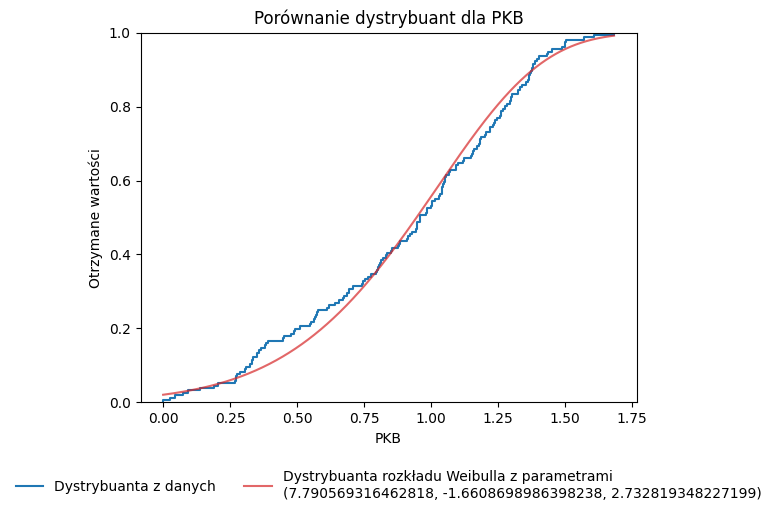

In [33]:
sns.ecdfplot(data = x, label = "Dystrybuanta z danych")

t = np.linspace(np.min(x), np.max(x), 1000)
# mu, std = st.norm.fit(x) # próbowałam dopasowac gamme, t studenta i normalny i wygladaja tak samo
# F_theo = st.norm.cdf(t, mu, std)
params = st.weibull_min.fit(x)
F_theo = st.weibull_min.cdf(t, params[0], loc =params[1], scale=params[2])
plt.plot(t, F_theo, label = f"Dystrybuanta rozkładu Weibulla z parametrami\n{params[0], params[1], params[2]}", color = "C3", alpha = 0.7)

plt.title("Porównanie dystrybuant dla PKB")
plt.xlabel("PKB")
plt.ylabel("Otrzymane wartości")
plt.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)

### K_test dla y

In [34]:
print("Test kołmogorowa-Smirnowa:   " +  str(st.kstest((y- np.mean(y))/np.sqrt(np.sum((y - np.mean(y))**2)/(len(y)-1)), "norm")))

Test kołmogorowa-Smirnowa:   KstestResult(statistic=0.05780215493783686, pvalue=0.6527750342517223)


# wspołczynnik korelacji (pearsona)

In [35]:
def korelacja_1(x, y):
    cov = np.mean(x*y) - np.mean(x)*np.mean(y)
    result = cov/(np.std(x)* np.std(y))
    return result

In [36]:
print(korelacja_1(x,y))

0.793882867878125
